In [187]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [188]:
user = int(input("enter the 1 for Heart and 2 for Air Quality"))

In [189]:
if user==1:
    df=pd.read_csv(r'C:\Users\bprat\OneDrive\Desktop\dsbda\assignment5\heart.csv')
else:
    df = pd.read_csv(r'C:\Users\bprat\OneDrive\Desktop\dsbda\assignment5\India Air Quality Data.csv', encoding='ISO-8859-1')

df.head(10)

C:\Users\bprat\AppData\Local\Temp\ipykernel_7200\3677970043.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\bprat\OneDrive\Desktop\dsbda\assignment5\India Air Quality Data.csv', encoding='ISO-8859-1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151.0,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [190]:
# df.info()
if user==1:
    correlation=df.corr()['target'].sort_values(ascending=False)
    print(correlation)
if user==2:
    df=df[['state','location','type','so2','no2','date']]
    df=df.dropna()
    df=df.reset_index()
    df.index=df['index']
    df.drop(columns=['index'],inplace=True)
    df['date']=pd.to_datetime(df['date'])
    print(df.shape)

(394176, 6)


In [191]:
df.describe()

,so2,no2,date
count,394176.000000,394176.000000,394176
mean,10.772911,26.178366,2010-05-19 06:08:46.936191232
min,0.000000,0.000000,1987-01-01 00:00:00
25%,5.000000,14.000000,2007-11-15 00:00:00
50%,8.000000,22.000000,2011-04-08 00:00:00
75%,13.500000,32.900000,2013-11-11 00:00:00
max,909.000000,876.000000,2015-12-31 00:00:00
std,11.125122,18.498991,NaN


In [192]:
from sklearn.preprocessing import LabelEncoder
if user==1:
    print(df.target.value_counts())
if user==2:
    each_state = {
    'state': [],
    'no2': [],
    'so2': []
    }
    temp_state = ''
    so2_sum = 0
    no2_sum = 0
    count = 0

    for index, row in df.iterrows():
        if row['state'] == temp_state:
            so2_sum += row['so2']
            no2_sum += row['no2']
            count += 1
        else:
            if temp_state != '':
                avg_so2 = so2_sum / count
                avg_no2 = no2_sum / count

                each_state['state'].append(temp_state)
                each_state['so2'].append(avg_so2)
                each_state['no2'].append(avg_no2)

            # Reset variables for the new state
            temp_state = row['state']
            so2_sum = row['so2']
            no2_sum = row['no2']
            count = 1
    each_state=pd.DataFrame(each_state)


In [193]:
# each_state        open this for  user input 2

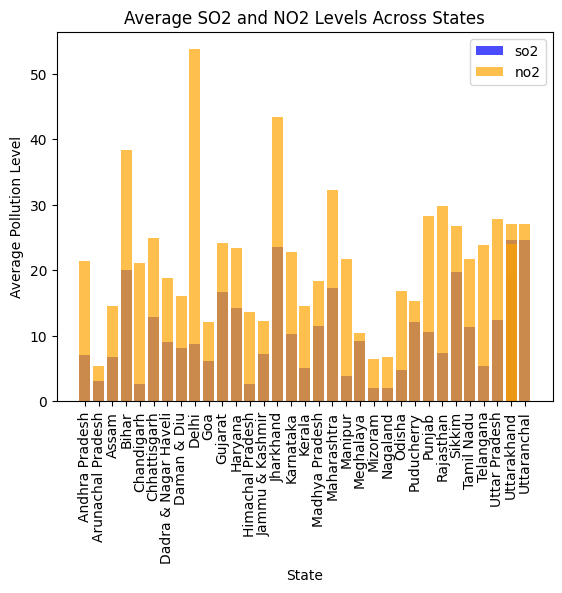

In [194]:
if user==1:
    sns.countplot(x='target',data=df);
if user==2:
    plt.bar(each_state['state'], each_state['so2'], label='so2', color='blue', alpha=0.7)
    plt.bar(each_state['state'], each_state['no2'], label='no2', color='orange', alpha=0.7)
    plt.xlabel('State')
    plt.ylabel('Average Pollution Level')
    plt.title('Average SO2 and NO2 Levels Across States')
    plt.xticks(rotation=90) 
    plt.legend()
plt.show()

In [195]:
df

,state,location,type,so2,no2,date
index,,,,,,
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,1990-03-01
...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,2015-12-21


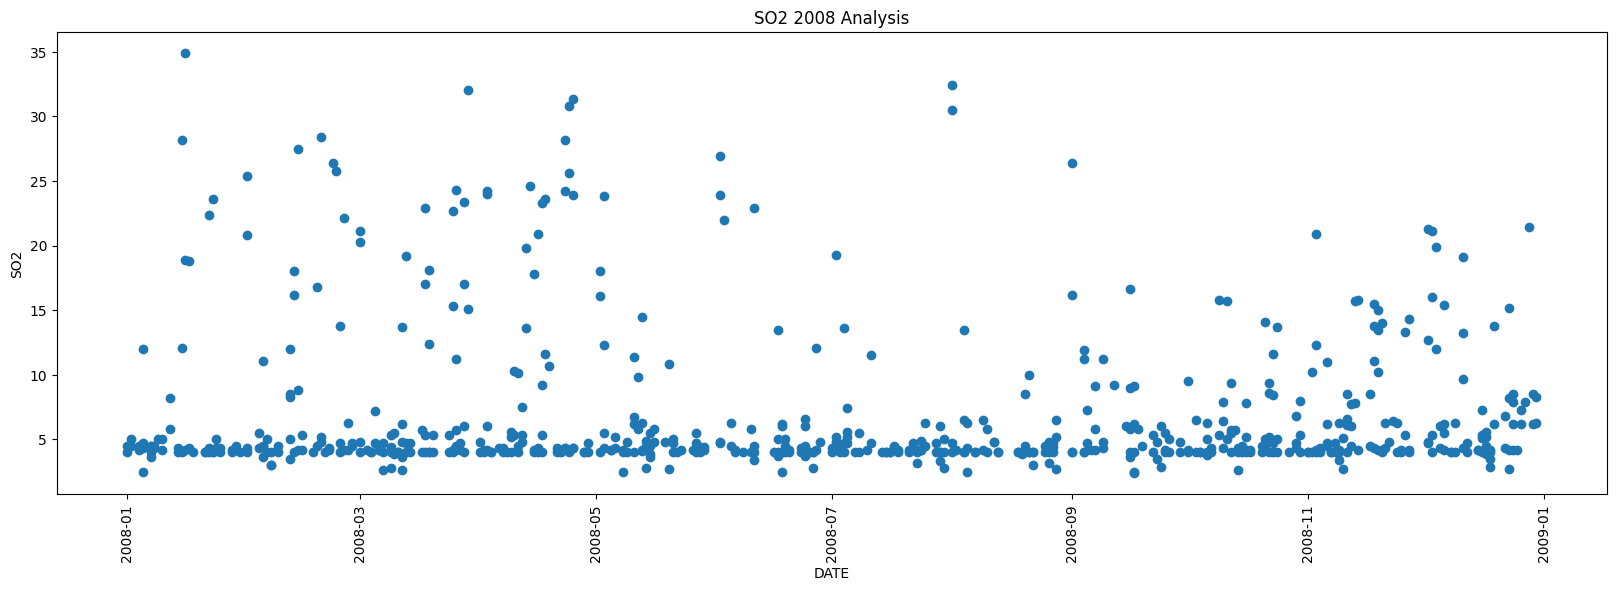

In [196]:
if user==1:
    countNoDisease = len(df[df.target == 0])
    countHaveDisease = len(df[df.target == 1])
    print("Percentage of Patients Haven't Heart Disease: ", (countNoDisease / (len(df.target))*100), "%")
    print("Percentage of Patients Have Heart Disease: ", (countHaveDisease / (len(df.target))*100), "%")
if user==2:
    delhi_df = df[(df['state'] == 'Delhi') & (df['date'].dt.year == 2008)]
    plt.figure(figsize=(20,6))
    plt.plot_date(x='date',y='so2',data=delhi_df[['date','so2']])
    plt.title('SO2 2008 Analysis')
    plt.xlabel('DATE')
    plt.ylabel('SO2')
    plt.xticks(rotation=90)
    plt.show()
    
    

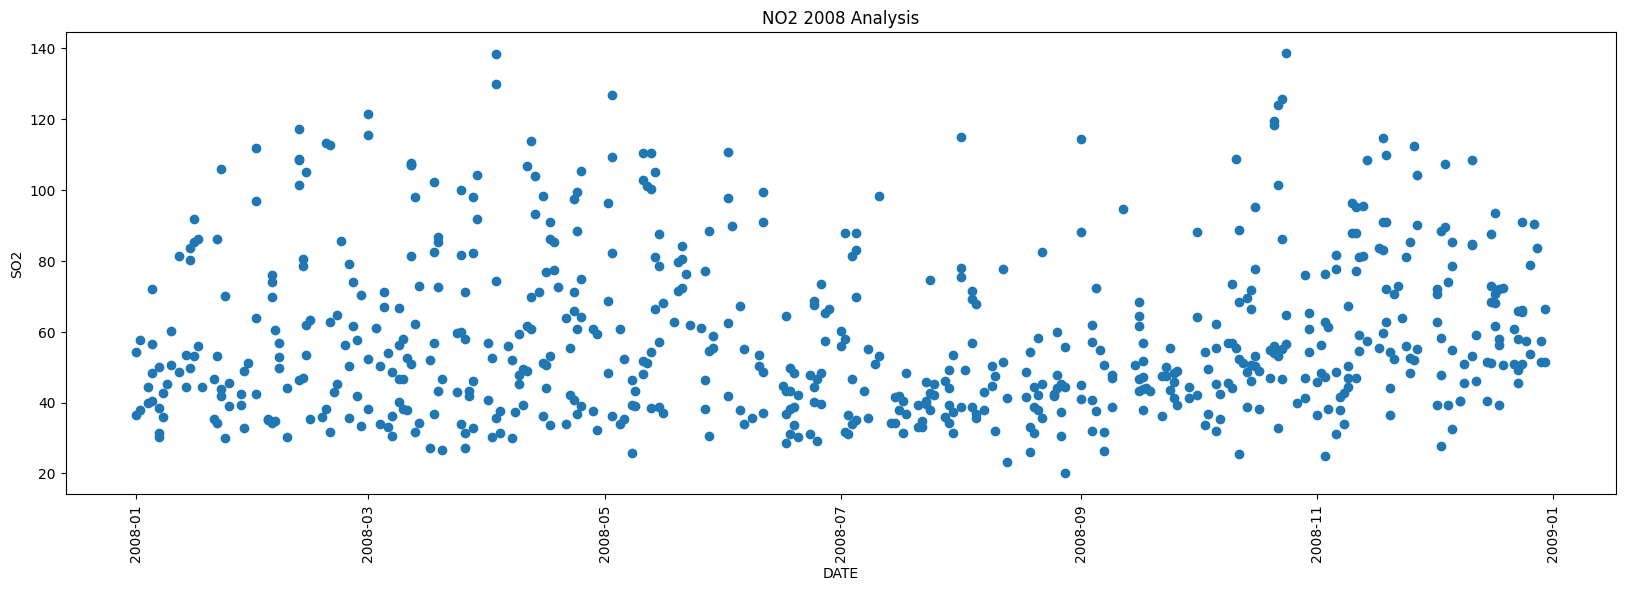

In [197]:
if user==1:
    sns.countplot(x='sex', data=df)
    plt.xlabel("Sex (0 = female, 1= male)")
if user==2:
    delhi_df = df[(df['state'] == 'Delhi') & (df['date'].dt.year == 2008)]
    plt.figure(figsize=(20,6))
    plt.plot_date(x='date',y='no2',data=delhi_df[['date','no2']])
    plt.title('NO2 2008 Analysis')
    plt.xlabel('DATE')
    plt.ylabel('SO2')
    plt.xticks(rotation=90)
plt.show()

In [198]:
if user==1:
    df.groupby('target').mean()

In [199]:
if user==1:
    pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
    plt.title('Heart Disease Frequency for Ages')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
    

In [200]:
if user==1:    
    pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
    plt.title('Heart Disease Frequency for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.xticks(rotation=0)
    plt.legend(["Haven't Disease", "Have Disease"])
    plt.ylabel('Frequency')
    plt.show()

In [201]:
if user==1:      
    plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
    plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
    plt.legend(["Disease", "Not Disease"])
    plt.xlabel("Age")
    plt.ylabel("Maximum Heart Rate")
    plt.show()

In [202]:
if user==1:      
    pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
    plt.title('Heart Disease Frequency for Slope')
    plt.xlabel('The Slope of The Peak Exercise ST Segment ')
    plt.xticks(rotation = 0)
    plt.ylabel('Frequency')
    plt.show()

In [203]:
if user==1:  
    pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
    plt.title('Heart Disease Frequency According To FBS')
    plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
    plt.xticks(rotation = 0)
    plt.legend(["Haven't Disease", "Have Disease"])
    plt.ylabel('Frequency of Disease or Not')
    plt.show()

In [204]:
if user==1:  
    pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
    plt.title('Heart Disease Frequency According To Chest Pain Type')
    plt.xlabel('Chest Pain Type')
    plt.xticks(rotation = 0)
    plt.ylabel('Frequency of Disease or Not')
    plt.show()